# Project: Wrangling and Analyze Data

## Import libraries

In [236]:
import pandas as pd
import requests
import tweepy
import time
import json
import numpy as np
import re

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [237]:
tweet_archive = pd.read_csv("twitter-archive-enhanced.csv")
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [238]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
res = requests.get(url, allow_redirects=True)
with open('image_prediction.tsv', 'wb') as file:
    file.write(res.content)
print(res)

<Response [200]>


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [239]:
consumer_key = 'DnVOLqKhguKff9Z6hO8t2cktH'
consumer_secret = 'RcNFzk8WL4HJcPGz1NpVOar4j7g02ox4iWUKclnl4ekGJeh5HR'
access_token = '422293955-LpuVyFhnXOcAHkw2a4Tn0LNzn4SdFM8Q4J0BAia8'
access_secret = '9b0tKWQRKma7rzw55lHsOajtBMTP4fN5jrbMop5qnQxGR'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

fails_dict = {}
start = time.time()
count = 0

downloaded_tweets = []

with open('tweet_json.txt', 'r') as tweets_status:
    for tweet in tweets_status.readlines():
        tweet_json = json.loads(tweet)
        downloaded_tweets.append(tweet_json["id"])

with open('tweet_json.txt', 'a') as tweets_file:
    for tweet_id in tweet_archive.tweet_id:
        count = count + 1
        if tweet_id not in downloaded_tweets:
            print("Trying tweet {}".format(count))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                tweet_json = json.dumps(tweet._json)    
                tweets_file.write(tweet_json)
                tweets_file.write('\n')
            except tweepy.TweepyException as e:
                print("{} Failed: {}".format(tweet_id, e))
                fails_dict[tweet_id] = str(e)
                pass
        else:
            pass
#             print("Tweet {} already downloaded".format(tweet_id))


end = time.time()

print(end - start)

with open('tweet_json_failed.txt', 'w') as failed_tweets_file:
    print(len(fails_dict))
    
    failed_ids = json.dumps(fails_dict)    
    failed_tweets_file.write(failed_ids)


                


Trying tweet 20
888202515573088257 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 96
873697596434513921 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 102
872668790621863937 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 105
872261713294495745 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 119
869988702071779329 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 133
866816280283807744 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 156
861769973181624320 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 183
856602993587888130 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 186
856330835276025856 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 212
851953902622658560 Failed: 404 Not Found
144 - No status found with that ID.
Trying tweet 213
851861385021730816 Failed: 404 Not Found
144 

4. Read tweet_json.txt

In [240]:
tweet_json_dict = []
with open('tweet_json.txt', 'r') as tweet_json_file:
    for tweet in tweet_json_file.readlines():
        tweet_dict = json.loads(tweet)
        
        hashtags = [tag['text'] for tag in tweet_dict["entities"]['hashtags']]
        
        tweet_json_dict.append({
            "tweet_id": tweet_dict['id'],
            "hashtags": '~'.join(hashtags),
            "retweet_count": tweet_dict['retweet_count'],
            "favorite_count": tweet_dict['favorite_count'],
            "lang": tweet_dict['lang'],
        })
        
        
tweet_json = pd.DataFrame(tweet_json_dict)

In [241]:
tweet_json.head()

,tweet_id,hashtags,retweet_count,favorite_count,lang
0,891327558926688256,BarkWeek,7765,35323,en
1,892420643555336193,,7010,33829,en
2,892177421306343426,,5302,29340,en
3,891815181378084864,,3482,22070,en
4,891689557279858688,,7228,36953,en


## Assessing Data

### Quality issues
1. Nulls represented as None and NaN in name, doggo, floofer,pupper, puppo columns

2. Incorrect Dog Names e.g 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'O',

3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_id are int not float

4. Retweets are present in dataset

5. Retweets related column not needed

6. Missing Dog Names 

7. Source column uses html anchor tag

8. timestamp is timestamp not string

9. Tweet with id 810984652412424192 has wrong rating 24/7, should be 

10. Tweet with id 740373189193256964 has wrong rating 9/11, should be 14/10

11. Tweet with id 682962037429899265 has wrong rating 7/11, should be 10/10

12. Tweet with id 666287406224695296 has wrong rating 1/2, should be 9/10

### Tidiness issues

1. doggo, floofer,pupper, puppo should be turn to a single column (dog_stage)
2. tweet_json_df should be part of tweet_archive

## Cleaning Data

In [242]:
# Make copies of original pieces of data
tweet_archive_clean = tweet_archive.copy()
tweet_json_clean = tweet_json.copy()

## Quality Issues

### Issue #1:

tweet_archive: `Nulls represented as None in name, doggo, floofer,pupper, puppo columns`

#### Define:
replace all Null values in name, doggo, floofer,pupper, puppo columns with np.nan

#### Code

In [243]:
columns_with_none = ["name", "doggo", "floofer", "pupper", "puppo"]
for col in columns_with_none:
    tweet_archive_clean[col].replace('None', np.NaN, inplace=True)

#### Test

In [244]:
for col in columns_with_none:
    print(tweet_archive_clean[tweet_archive_clean[col] == 'None'].shape)

tweet_archive_clean    

(0, 17)
(0, 17)
(0, 17)
(0, 17)
(0, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


### Issue #2:

2. Incorrect Dog Names e.g 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'O',

#### Define

find all records with dog name in this list 
manually replace where possible then change others to np.nan

'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'O'

#### Code

In [245]:
wrong_names = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'O']

tweet_archive_clean.loc[tweet_archive_clean['name'].isin(wrong_names), 'name'] = np.nan

#### Test

In [246]:
tweet_archive_clean[tweet_archive_clean['name'].isin(wrong_names)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_id are int not float

#### Define

change type of: 

1. in_reply_to_status_id
2. in_reply_to_user_id
3. retweeted_status_id
4. retweeted_status_user_id 

to int

#### Code

In [247]:
column_to_int = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']

for col in column_to_int:
    tweet_archive_clean[col] = tweet_archive_clean[col].astype('Int64')


#### Test

In [248]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   int64 
 1   in_reply_to_status_id       78 non-null     Int64 
 2   in_reply_to_user_id         78 non-null     Int64 
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         181 non-null    Int64 
 7   retweeted_status_user_id    181 non-null    Int64 
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        1501 non-null   object
 13  doggo                       97 non-null     obje

### Issue #4:

4. Retweets are present in dataset

#### Define

Drop all rows that any of the columns:

1. in_reply_to_status_id
2. in_reply_to_user_id
3. retweeted_status_id
4. retweeted_status_user_id 

has a value then drop all columns

#### Code

In [249]:
is_replies_or_retweet = (tweet_archive_clean['in_reply_to_status_id'].isna() == False) | (tweet_archive_clean['retweeted_status_id'].isna() == False)


print(is_replies_or_retweet.value_counts())
replies_and_retweets = tweet_archive_clean[is_replies_or_retweet]

print(replies_and_retweets.shape)
tweet_archive_clean.drop(replies_and_retweets.index, axis=0, inplace=True)


False    2097
True      259
dtype: int64
(259, 17)


#### Test

In [250]:
is_replies_or_retweet = (tweet_archive_clean['in_reply_to_status_id'].isna() == False) | (tweet_archive_clean['retweeted_status_id'].isna() == False)
print(is_replies_or_retweet.value_counts())

False    2097
dtype: int64


### Issue #5:

`Retweets related column not needed

## Define

Drop columns 

1. in_reply_to_status_id
1. in_reply_to_user_id
1. retweeted_status_id
1. retweeted_status_user_id
1. retweeted_status_timestamp

## Code

In [251]:
tweet_archive_clean.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

## Test

In [252]:
tweet_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #6:

Missing dog names

#### Define

Find missing dog names where possible


#### Code

In [253]:
tweet_archive_clean['extracted_name'] = tweet_archive_clean.text.apply(lambda x: re.findall(r'(?<=named )[^-.]*', x)[0] if len(re.findall(r'(?<=named )[^-.]*', x)) > 0 else np.nan)

In [254]:
tweet_archive_clean.loc[tweet_archive_clean.extracted_name.isna() == False, 'name'] = tweet_archive_clean['extracted_name']

#### Test

In [255]:
tweet_archive_clean[tweet_archive_clean.extracted_name.isna() == False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,extracted_name
1853,675706639471788032,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,https://twitter.com/dog_rates/status/675706639...,10,10,Wylie,NaN,NaN,NaN,NaN,Wylie
1955,673636718965334016,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10,10,Kip,NaN,NaN,NaN,NaN,Kip
2034,671743150407421952,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,https://twitter.com/dog_rates/status/671743150...,11,10,Jacob (Yacōb),NaN,NaN,NaN,NaN,Jacob (Yacōb)
2066,671147085991960577,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,https://twitter.com/dog_rates/status/671147085...,9,10,Rufus,NaN,NaN,NaN,NaN,Rufus
2116,670427002554466305,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,https://twitter.com/dog_rates/status/670427002...,9,10,Spork,NaN,NaN,NaN,NaN,Spork
2125,670361874861563904,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,https://twitter.com/dog_rates/status/670361874...,9,10,Cherokee,NaN,NaN,NaN,NaN,Cherokee
2128,670303360680108032,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,https://twitter.com/dog_rates/status/670303360...,9,10,Hemry,NaN,NaN,NaN,NaN,Hemry
2146,669923323644657664,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,https://twitter.com/dog_rates/status/669923323...,10,10,Alphred,NaN,NaN,NaN,NaN,Alphred
2161,669564461267722241,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,https://twitter.com/dog_rates/status/669564461...,10,10,Alfredo,NaN,NaN,NaN,NaN,Alfredo
2166,669363888236994561,2015-11-25 03:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Gingivitis Pumpernickel named Z...,https://twitter.com/dog_rates/status/669363888...,10,10,Zeus,NaN,NaN,NaN,NaN,Zeus


In [256]:
# Drop 'extracted_name' column

tweet_archive_clean.drop(columns=['extracted_name'], inplace=True)
tweet_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

## Issue #7:

Source column uses html anchor tag

## Define

Replace values with categorical values


## Code

In [257]:
categories = {
    'iPhone': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
    'Vine': '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
    'Twitter Web': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
    'TweetDeck': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
}

for category in categories.keys():
    tweet_archive_clean.loc[tweet_archive_clean.source == categories[category], 'source'] = category

## Test

In [258]:
tweet_archive_clean.source.value_counts()

iPhone         1964
Vine             91
Twitter Web      31
TweetDeck        11
Name: source, dtype: int64

## Issue 8
8. timestamp is datetime not string

## Define

Convert timestamp column to pandas datetime


## Code

In [259]:
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'])

## Test

In [260]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1412 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3

## Issue 9

9. Tweet with id 810984652412424192 has wrong rating 24/7

## Define

drop the tweet with ID 810984652412424192

## Code

In [261]:
tweet_archive_clean.drop(tweet_archive_clean.query("tweet_id == 810984652412424192").index, inplace=True)

## Test

In [262]:
tweet_archive_clean.query("tweet_id == 810984652412424192")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Issue 10

10. Tweet with id 740373189193256964 has wrong rating 9/11, should be 14/10


## Define

Update numerator and denominator for Tweet with id 740373189193256964 to 14 and 10 respectively

## Code

In [263]:
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

## Test

In [264]:
tweet_archive_clean.query("tweet_id == 740373189193256964")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38+00:00,iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,NaN,NaN,NaN,NaN,NaN


## Issue 11

11. Tweet with id 682962037429899265 has wrong rating 7/11, should be 10/10


## Define

Update numerator and denominator for Tweet with id 682962037429899265 to 10 and 10 respectively


## Code

In [265]:
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10

## Test

In [266]:
tweet_archive_clean.query("tweet_id == 682962037429899265")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,2016-01-01 16:30:13+00:00,iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,NaN,NaN,NaN,NaN


## Issue 12

12. Tweet with id 666287406224695296 has wrong rating 1/2, should be 9/10

## Define

Update numerator and denominator for Tweet with id 666287406224695296 to 9 and 10 respectively


## Code

In [267]:
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

## Test

In [268]:
tweet_archive_clean.query("tweet_id == 666287406224695296")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11+00:00,iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,NaN,NaN,NaN,NaN,NaN


## Tidyness issue

### Issue 1

1. doggo, floofer,pupper, puppo should be turn to a single column (dog_stage)
2. Drop columns doggo, floofer,pupper, puppo

## Define

Combine doggo, floofer,pupper, puppo to a single column (dog_stage)


## Code

In [269]:
tweet_archive_clean['dog_stage'] = tweet_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).agg(lambda x: ','.join([stage for stage in x.values if stage != 'nan']), axis=1)
tweet_archive_clean.loc[tweet_archive_clean.dog_stage == '', 'dog_stage'] = np.nan
tweet_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

## Test

In [270]:
print(tweet_archive_clean['dog_stage'].value_counts())
print("----------------------------------------------")
print(tweet_archive_clean.info())

pupper           221
doggo             72
puppo             23
doggo,pupper       9
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   int64              
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   source              2096 non-null   object             
 3   text                2096 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2096 non-null   int64              
 6   rating_denominator  2096 non-null   int64              
 7   name                1411 non-null   object             
 8   dog_stage           336 non-null    object             

### Issue 2

2. tweet_json_df should be part of tweet_archive

## Define

merge tweet_json_clean to tweet_archive.

## Code

In [271]:
tweet_archive_merged = tweet_archive_clean.merge(tweet_json_clean, on="tweet_id")

## Test

In [272]:
tweet_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 0 to 2087
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2088 non-null   int64              
 1   timestamp           2088 non-null   datetime64[ns, UTC]
 2   source              2088 non-null   object             
 3   text                2088 non-null   object             
 4   expanded_urls       2085 non-null   object             
 5   rating_numerator    2088 non-null   int64              
 6   rating_denominator  2088 non-null   int64              
 7   name                1404 non-null   object             
 8   dog_stage           335 non-null    object             
 9   hashtags            2088 non-null   object             
 10  retweet_count       2088 non-null   int64              
 11  favorite_count      2088 non-null   int64              
 12  lang                2088 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [273]:
tweet_archive_merged.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

# Insight 1

Average retweet and favorite counts are approximately 2306 and 7785 respectivley 

In [274]:
tweet_archive_merged.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.088000e+03,2088.000000,2088.000000,2088.000000,2088.000000
mean,7.363013e+17,12.192050,10.454981,2306.331418,7785.028736
std,6.703071e+16,40.450186,6.656316,4042.436246,11338.465996
min,6.660209e+17,0.000000,10.000000,11.000000,66.000000
25%,6.767367e+17,10.000000,10.000000,511.000000,1716.750000
50%,7.094844e+17,11.000000,10.000000,1114.000000,3536.000000
75%,7.870529e+17,12.000000,10.000000,2623.500000,9699.250000
max,8.924206e+17,1776.000000,170.000000,70784.000000,144952.000000


# Insight 2

Iphone is the main device used for the tweets

iPhone         1956
Vine             91
Twitter Web      31
TweetDeck        10
Name: source, dtype: int64


<AxesSubplot:title={'center':'Tweets sources'}>

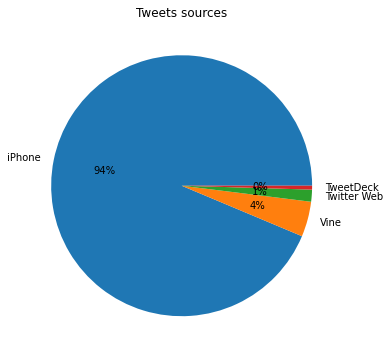

In [275]:
print(tweet_archive_merged.source.value_counts())

tweet_archive_merged.source.value_counts().plot.pie(title="Tweets sources", figsize=(11, 6), ylabel='', autopct='%.0f%%')


# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

# Insight 3

1753 out of 2088 of the tweet has no dog stage

True     1753
False     335
Name: dog_stage, dtype: int64


<AxesSubplot:title={'center':'Percentage of tweets that has dog stages'}>

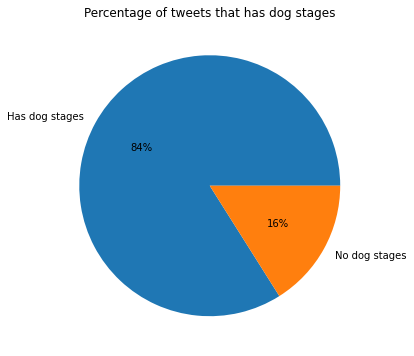

In [276]:
# Insight 2
dog_stage_df = tweet_archive_merged.dog_stage.isna().value_counts()

print(dog_stage_df)

dog_stage_df.plot.pie(title="Percentage of tweets that has dog stages", figsize=(11, 6), ylabel='', labels=["Has dog stages", "No dog stages"], autopct='%.0f%%')

# Insight 4

Total tweets with dog stages is 335 having doggo with the highest frequency(82) and pupper with the lowest(9)

array([<AxesSubplot:>], dtype=object)

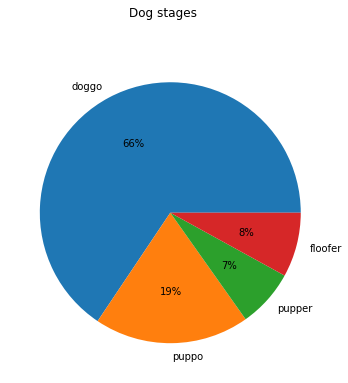

In [277]:
# Insight 4
dog_stages_count  = tweet_archive_merged.dog_stage.value_counts()
dog_stages_count_dict = {}
for stages in dog_stages_count.index[1:]:
    for stage in stages.split(','):
        dog_stages_count_dict[stage] = dog_stages_count_dict.get(stage, 0) + dog_stages_count[stages]

pd.DataFrame.from_dict(dog_stages_count_dict, orient='index').plot.pie(subplots=True, figsize=(8, 6), title="Dog stages", ylabel='', autopct='%.0f%%', legend=False)


### Visualization

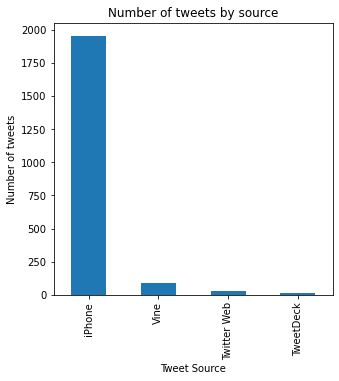

In [278]:
tweet_archive_merged.source.value_counts().plot.bar(figsize=(5, 5), xlabel="Tweet Source", ylabel="Number of tweets", title="Number of tweets by source");